# Linear Regression on Abalone data

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Descibe the data

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


# Checking the null values

<AxesSubplot:>

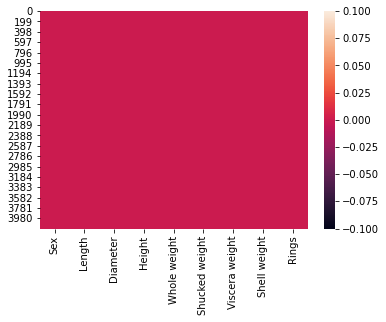

In [9]:
sns.heatmap(df.isnull())

# Visualization

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

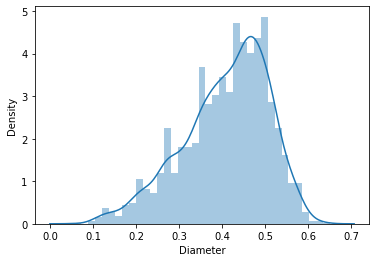

In [10]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

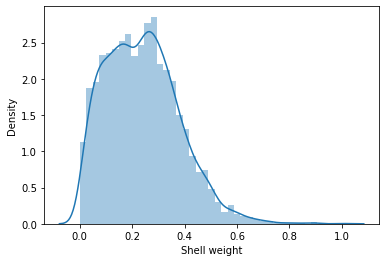

In [11]:
sns.distplot(df['Shell weight'])

In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Visualization of the data

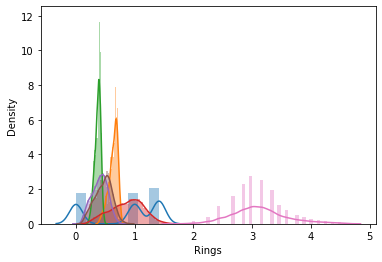

In [89]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='Height', ylabel='Density'>

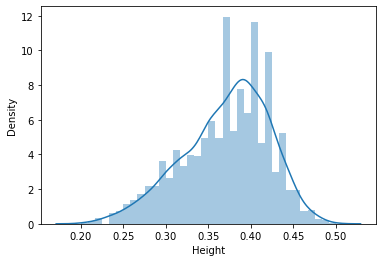

In [90]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

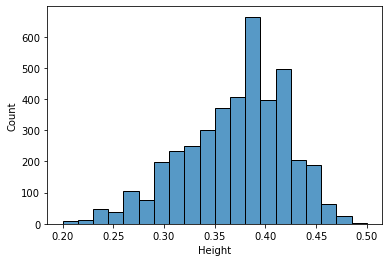

In [91]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

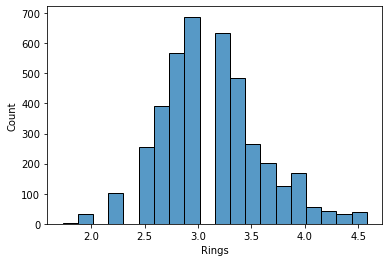

In [92]:
sns.histplot(df['Rings'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

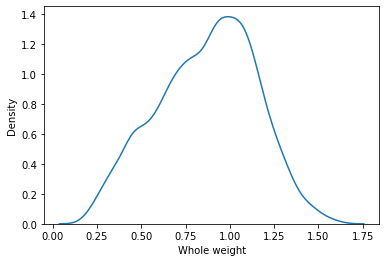

In [93]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

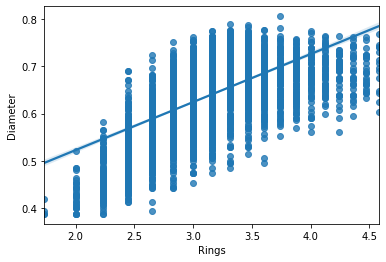

In [94]:
sns.regplot(y='Diameter',x='Rings',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

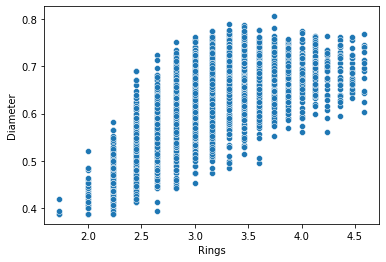

In [95]:
sns.scatterplot(y='Diameter',x='Rings',data=df)

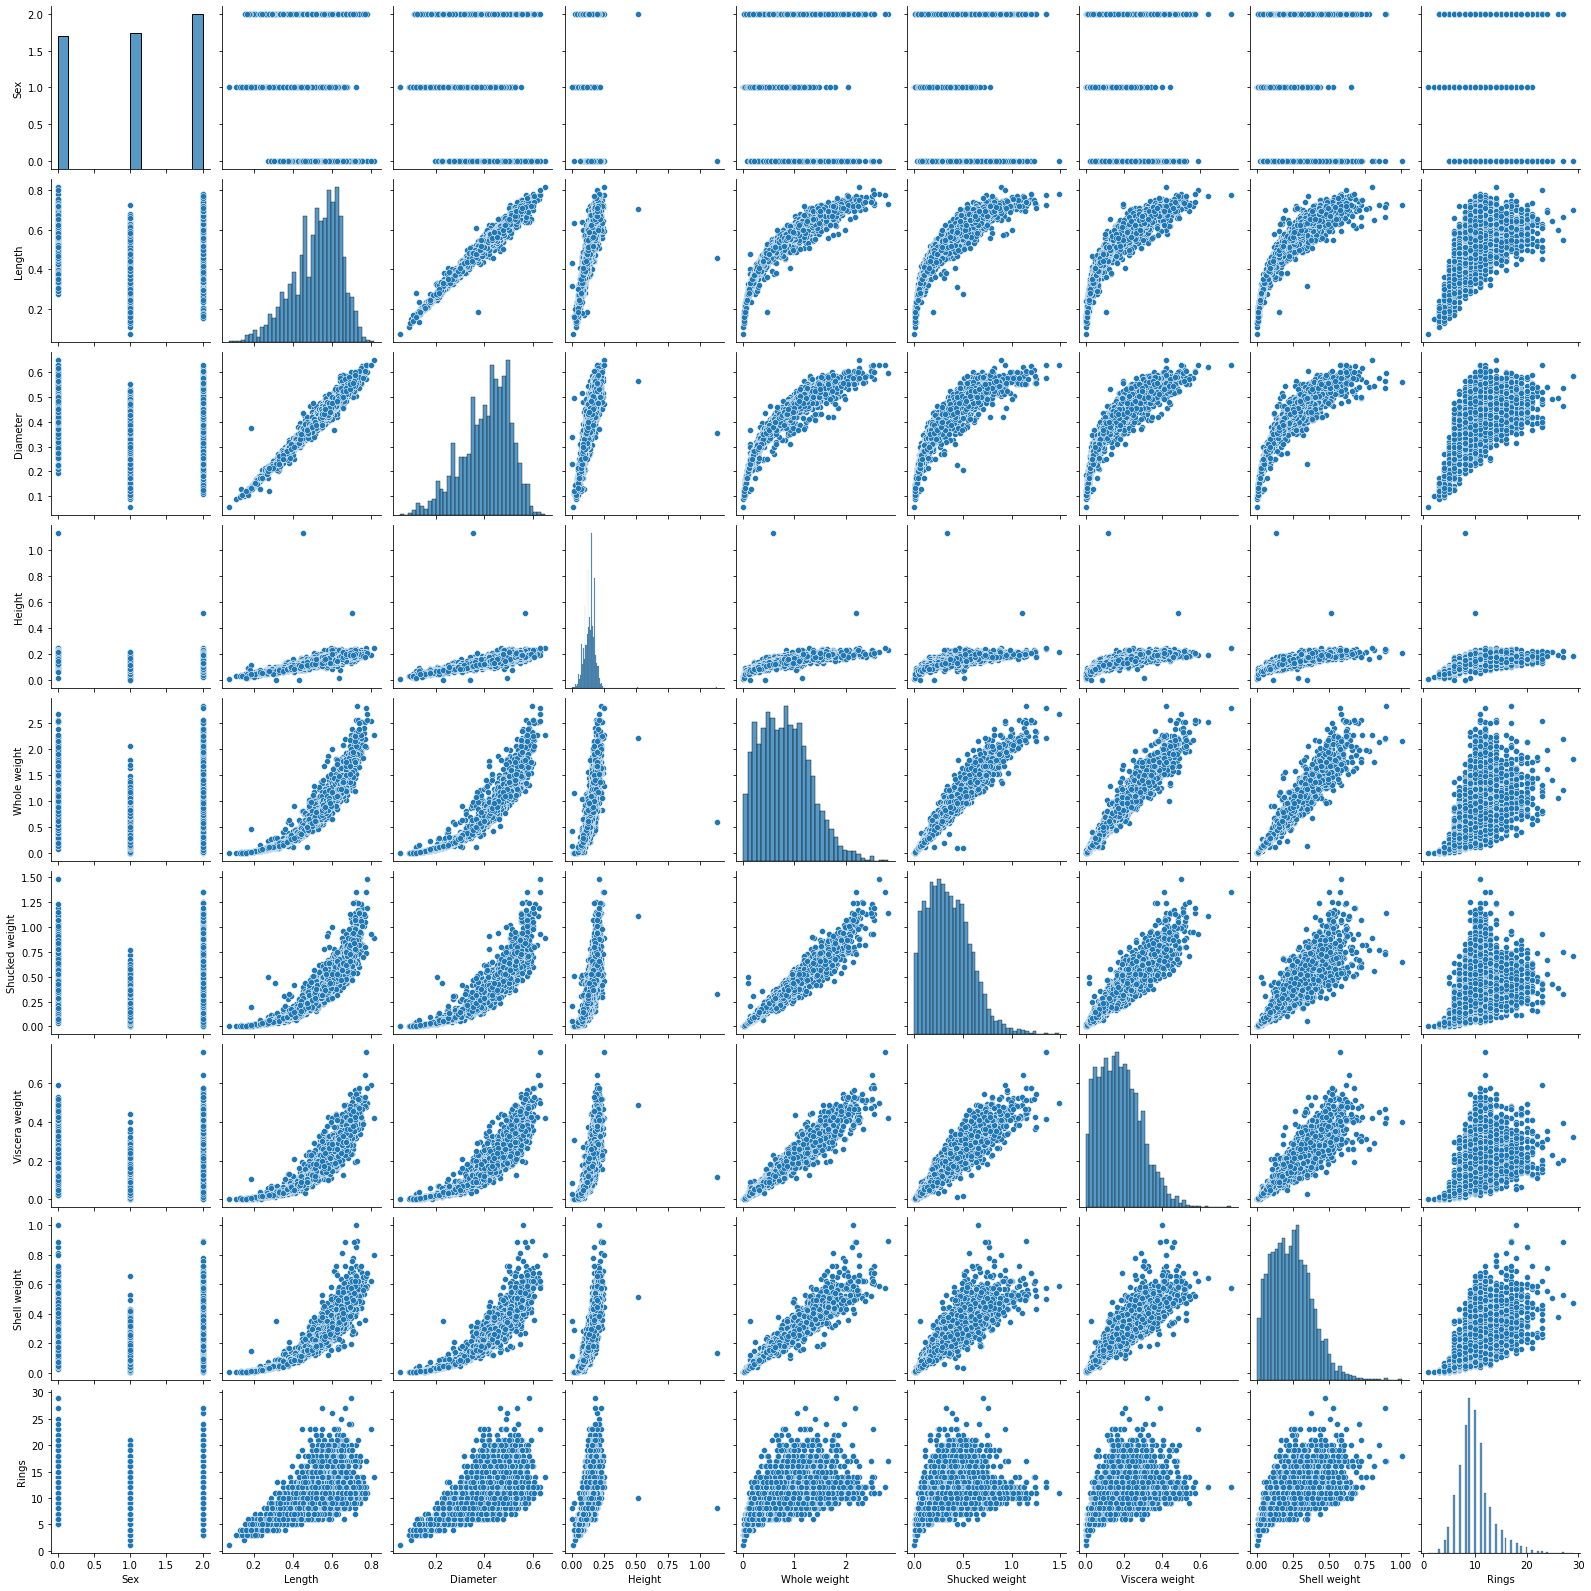

In [23]:
sns.pairplot(df)

# Encoding the data

In [96]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.604152,0.308221,0.716938,0.317805,0.387298,3.872983
1,2,0.514782,0.300000,0.474868,0.220227,0.264575,2.645751
2,0,0.648074,0.367423,0.822800,0.376165,0.458258,3.000000
3,2,0.604152,0.353553,0.718331,0.337639,0.393700,3.162278
4,1,0.504975,0.282843,0.452769,0.198746,0.234521,2.645751
...,...,...,...,...,...,...,...
4172,0,0.670820,0.406202,0.941807,0.488876,0.498999,3.316625
4173,2,0.663325,0.367423,0.982853,0.463141,0.510392,3.162278
4174,2,0.689202,0.452769,1.084435,0.536190,0.554977,3.000000
4175,0,0.696419,0.387298,1.046184,0.510882,0.544059,3.162278


In [24]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Mean of height column is greater than median, hence it is right skewed. Similar with Whole weight, Shucked Weight.
Standard deviation in Whole weight, Shucked Weight is also more than +/-3. It means data speed is high.

High gap between 75th percentile and max in rings. So few outliers are present.


# Checking Skewness

In [25]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Keeping +/- 0.5 as the range of skewness. here are the columns which does not lie this range

Height

Shucked weight

Shell weight


And some values are positive and some negative so skewness is present

In [26]:
import numpy as np
df=np.sqrt(df)
df.skew()

Sex              -0.548920
Length           -1.020771
Diameter         -0.996014
Height           -0.295641
Whole weight     -0.236646
Shucked weight   -0.141443
Viscera weight   -0.183321
Shell weight     -0.222772
Rings             0.471366
dtype: float64

# Corelation

In [27]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.161714,-0.167079,-0.165993,-0.161350,-0.139254,-0.170015,-0.168836,-0.141066
Length,-0.161714,1.000000,0.988229,0.886327,0.959603,0.942020,0.941559,0.941724,0.618560
Diameter,-0.167079,0.988229,1.000000,0.891417,0.959408,0.937958,0.939053,0.947182,0.634462
Height,-0.165993,0.886327,0.891417,1.000000,0.893351,0.858492,0.877222,0.892520,0.639503
Whole weight,-0.161350,0.959603,0.959408,0.893351,1.000000,0.978790,0.976945,0.971724,0.621722
Shucked weight,-0.139254,0.942020,0.937958,0.858492,0.978790,1.000000,0.951864,0.923565,0.525776
Viscera weight,-0.170015,0.941559,0.939053,0.877222,0.976945,0.951864,1.000000,0.940828,0.595793
Shell weight,-0.168836,0.941724,0.947182,0.892520,0.971724,0.923565,0.940828,1.000000,0.688298
Rings,-0.141066,0.618560,0.634462,0.639503,0.621722,0.525776,0.595793,0.688298,1.000000


Some column has same correlation hence muliti collinearity is present.
Columns having same corelation are
Diameter
Height
Whole weight

In [28]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(22,7))

#sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

In [29]:
#detecting outliers

from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))


(array([ 148,  148,  149,  149,  163,  166,  232,  236,  236,  236,  236,
        237,  237,  237,  238,  238,  238,  239,  239,  239,  270,  275,
        294,  305,  305,  306,  306,  306,  313,  314,  321,  321,  351,
        433,  465,  465,  480,  501,  523,  523,  525,  525,  526,  526,
        611,  611,  674,  675,  678,  694,  694,  694,  696,  696,  718,
        718,  718,  719,  719,  719,  719,  720,  720,  720,  891,  892,
        898, 1053, 1053, 1054, 1055, 1055, 1056, 1174, 1209, 1210, 1257,
       1417, 1429, 1429, 1429, 1528, 1763, 1763, 1824, 1824, 1986, 1986,
       1987, 1987, 1987, 2051, 2108, 2108, 2114, 2114, 2114, 2115, 2115,
       2161, 2169, 2169, 2169, 2171, 2171, 2171, 2172, 2201, 2209, 2305,
       2334, 2335, 2343, 2343, 2371, 2371, 2380, 2380, 2381, 2381, 2381,
       2436, 2458, 2458, 2711, 2711, 2711, 3141, 3141, 3143, 3149, 3190,
       3190, 3190, 3280, 3318, 3318, 3380, 3380, 3472, 3472, 3600, 3600,
       3716, 3837, 3837, 3837, 3899, 3899, 3899, 3

In [30]:
dfnew=df[(dfzscore<3).all(axis=1)]
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.414214,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298,3.872983
1,1.414214,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575,2.645751
2,0.000000,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258,3.000000
3,1.414214,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700,3.162278
4,1.000000,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521,2.645751
...,...,...,...,...,...,...,...,...,...
4172,0.000000,0.751665,0.670820,0.406202,0.941807,0.608276,0.488876,0.498999,3.316625
4173,1.414214,0.768115,0.663325,0.367423,0.982853,0.662571,0.463141,0.510392,3.162278
4174,1.414214,0.774597,0.689202,0.452769,1.084435,0.724914,0.536190,0.554977,3.000000
4175,0.000000,0.790569,0.696419,0.387298,1.046184,0.728697,0.510882,0.544059,3.162278


In [31]:
dfnew.shape

(4090, 9)

In [32]:
df.shape

(4177, 9)

In [33]:
df=dfnew

In [34]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.157277,-0.163059,-0.165247,-0.155387,-0.134068,-0.164879,-0.162521,-0.130929
Length,-0.157277,1.000000,0.987882,0.907570,0.964522,0.945664,0.944895,0.946245,0.590942
Diameter,-0.163059,0.987882,1.000000,0.912525,0.962626,0.939495,0.940521,0.950853,0.608801
Height,-0.165247,0.907570,0.912525,1.000000,0.919792,0.880135,0.903508,0.924498,0.635910
Whole weight,-0.155387,0.964522,0.962626,0.919792,1.000000,0.977936,0.975440,0.970989,0.598228
Shucked weight,-0.134068,0.945664,0.939495,0.880135,0.977936,1.000000,0.948397,0.921250,0.500813
Viscera weight,-0.164879,0.944895,0.940521,0.903508,0.975440,0.948397,1.000000,0.938758,0.574948
Shell weight,-0.162521,0.946245,0.950853,0.924498,0.970989,0.921250,0.938758,1.000000,0.667328
Rings,-0.130929,0.590942,0.608801,0.635910,0.598228,0.500813,0.574948,0.667328,1.000000


<AxesSubplot:>

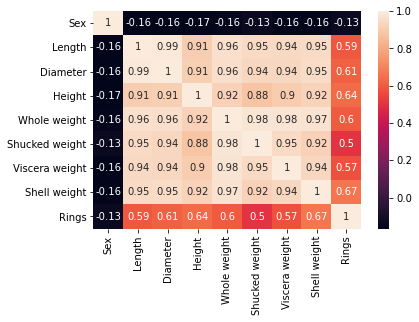

In [35]:
sns.heatmap(df.corr(),annot=True)

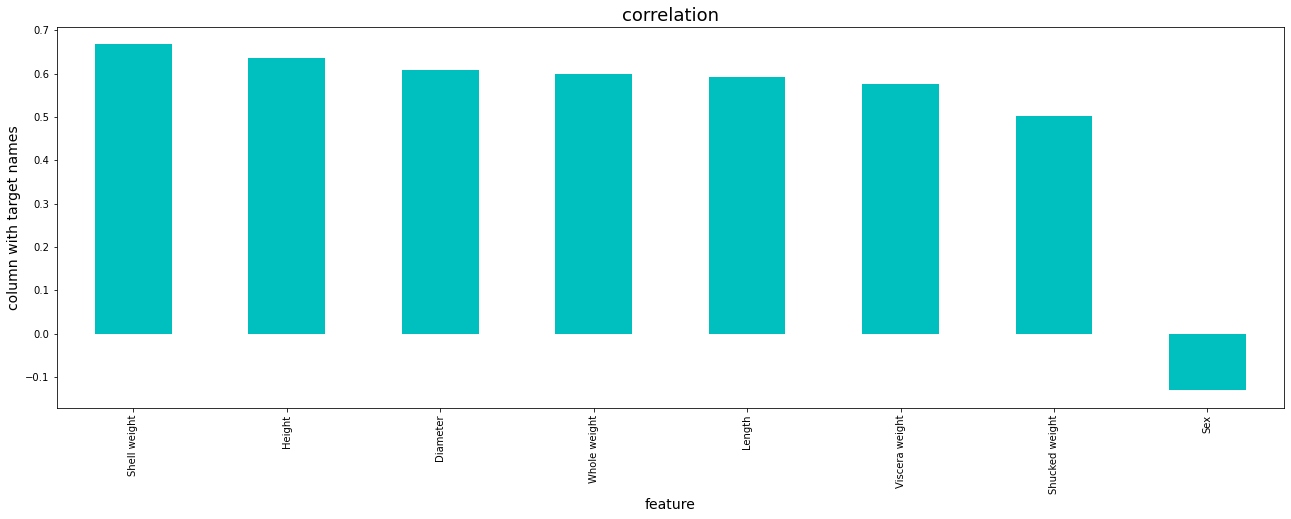

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.414214,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298
1,1.414214,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575
2,0.000000,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258
3,1.414214,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700
4,1.000000,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521
...,...,...,...,...,...,...,...,...
4172,0.000000,0.751665,0.670820,0.406202,0.941807,0.608276,0.488876,0.498999
4173,1.414214,0.768115,0.663325,0.367423,0.982853,0.662571,0.463141,0.510392
4174,1.414214,0.774597,0.689202,0.452769,1.084435,0.724914,0.536190,0.554977
4175,0.000000,0.790569,0.696419,0.387298,1.046184,0.728697,0.510882,0.544059


In [39]:
x.shape

(4090, 8)

In [40]:
x.shape[1]

8

In [41]:
y=df.iloc[:,-1]
y

0       3.872983
1       2.645751
2       3.000000
3       3.162278
4       2.645751
          ...   
4172    3.316625
4173    3.162278
4174    3.000000
4175    3.162278
4176    3.464102
Name: Rings, Length: 4090, dtype: float64

In [42]:
def vic_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [43]:
vic_calc()

    VIF Factor        features
0     3.067921             Sex
1  3009.054796          Length
2  3192.348388        Diameter
3   370.092227          Height
4  1578.303079    Whole weight
5   374.446663  Shucked weight
6   236.003367  Viscera weight
7   335.476984    Shell weight


Data cleansing
  Feature engineering----selection of feature/variables/columns
    
Very high VIF factor is there for Length and Shucked weight hence we drop this column because multicolinearity is present between the two.

In [44]:
df.drop(["Length","Shucked weight"],axis=1,inplace=True)

In [45]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,1.414214,0.604152,0.308221,0.716938,0.317805,0.387298,3.872983
1,1.414214,0.514782,0.300000,0.474868,0.220227,0.264575,2.645751
2,0.000000,0.648074,0.367423,0.822800,0.376165,0.458258,3.000000
3,1.414214,0.604152,0.353553,0.718331,0.337639,0.393700,3.162278
4,1.000000,0.504975,0.282843,0.452769,0.198746,0.234521,2.645751
...,...,...,...,...,...,...,...
4172,0.000000,0.670820,0.406202,0.941807,0.488876,0.498999,3.316625
4173,1.414214,0.663325,0.367423,0.982853,0.463141,0.510392,3.162278
4174,1.414214,0.689202,0.452769,1.084435,0.536190,0.554977,3.000000
4175,0.000000,0.696419,0.387298,1.046184,0.510882,0.544059,3.162278


In [46]:
x=df.iloc[:,:-1]

In [47]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.414214,0.604152,0.308221,0.716938,0.317805,0.387298
1,1.414214,0.514782,0.300000,0.474868,0.220227,0.264575
2,0.000000,0.648074,0.367423,0.822800,0.376165,0.458258
3,1.414214,0.604152,0.353553,0.718331,0.337639,0.393700
4,1.000000,0.504975,0.282843,0.452769,0.198746,0.234521
...,...,...,...,...,...,...
4172,0.000000,0.670820,0.406202,0.941807,0.488876,0.498999
4173,1.414214,0.663325,0.367423,0.982853,0.463141,0.510392
4174,1.414214,0.689202,0.452769,1.084435,0.536190,0.554977
4175,0.000000,0.696419,0.387298,1.046184,0.510882,0.544059


In [48]:
x.shape

(4090, 6)

In [49]:
vic_calc()

   VIF Factor        features
0    3.043065             Sex
1  336.929940        Diameter
2  354.877373          Height
3  482.149585    Whole weight
4  221.037205  Viscera weight
5  218.559455    Shell weight


<AxesSubplot:>

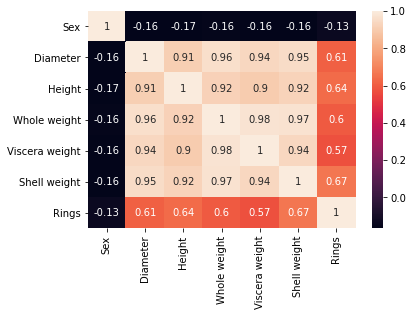

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
x.shape

(4090, 6)

In [52]:
df.iloc[:,:-1]

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.414214,0.604152,0.308221,0.716938,0.317805,0.387298
1,1.414214,0.514782,0.300000,0.474868,0.220227,0.264575
2,0.000000,0.648074,0.367423,0.822800,0.376165,0.458258
3,1.414214,0.604152,0.353553,0.718331,0.337639,0.393700
4,1.000000,0.504975,0.282843,0.452769,0.198746,0.234521
...,...,...,...,...,...,...
4172,0.000000,0.670820,0.406202,0.941807,0.488876,0.498999
4173,1.414214,0.663325,0.367423,0.982853,0.463141,0.510392
4174,1.414214,0.689202,0.452769,1.084435,0.536190,0.554977
4175,0.000000,0.696419,0.387298,1.046184,0.510882,0.544059


In [53]:
y.shape

(4090,)

In [54]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.97198826, -0.41354372, -1.23111995, -0.54788538, -0.65750366,
        -0.55095196],
       [ 0.97198826, -1.5662078 , -1.39263696, -1.41734864, -1.39151613,
        -1.39402553],
       [-1.41236957,  0.15293944, -0.06792785, -0.16765058, -0.21850138,
        -0.06348217],
       ...,
       [ 0.97198826,  0.68339454,  1.60891209,  0.77208862,  0.98526243,
         0.60095614],
       [-1.41236957,  0.77647583,  0.32256568,  0.63469615,  0.79488225,
         0.52594806],
       [ 0.97198826,  1.40282988,  1.38922809,  1.89075735,  1.56753355,
         1.62169212]])

In [55]:
#invert difference

inverted=scale.inverse_transform(x)
print(inverted)

[[1.41421356 0.6041523  0.3082207  0.71693793 0.31780497 0.38729833]
 [1.41421356 0.51478151 0.3        0.4748684  0.22022716 0.26457513]
 [0.         0.64807407 0.36742346 0.8228001  0.37616486 0.45825757]
 ...
 [1.41421356 0.68920244 0.45276926 1.08443534 0.53619026 0.55497748]
 [0.         0.69641941 0.38729833 1.04618354 0.51088159 0.54405882]
 [1.41421356 0.74498322 0.44158804 1.39588681 0.61359596 0.70356236]]


In [56]:
x.shape

(4090, 6)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [58]:
x_train.shape

(2863, 6)

In [59]:
x_test.shape

(1227, 6)

In [60]:
y_train.shape

(2863,)

In [61]:
y_test.shape

(1227,)

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([-0.00968325,  0.00428844,  0.10690415, -0.4083741 , -0.02022561,
        0.61825206])

In [63]:
features=["Sex","Diameter","Height","Whole weight","Viscera weight","Shell weight"]
list(zip(lr.coef_,features))

[(-0.009683252541429625, 'Sex'),
 (0.0042884406965459365, 'Diameter'),
 (0.10690414693400148, 'Height'),
 (-0.408374103936562, 'Whole weight'),
 (-0.02022561368600611, 'Viscera weight'),
 (0.6182520554566617, 'Shell weight')]

In [64]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,-0.009683
Diameter,0.004288
Height,0.106904
Whole weight,-0.408374
Viscera weight,-0.020226
Shell weight,0.618252


In [65]:
lr.intercept_

3.119080264033344

In [66]:
lr.score(x_train,y_train)

0.4840594414115734

In [67]:
pred=lr.predict(x_test)
pred

array([3.01865319, 2.94680302, 2.85066589, ..., 2.99844054, 3.06096312,
       2.40871568])

In [68]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,3.018653
1,2.946803
2,2.850666
3,3.163493
4,3.689095
...,...
1222,3.044884
1223,3.055384
1224,2.998441
1225,3.060963


In [69]:
print("mean absolute error:",mean_absolute_error(pred,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("r2_score:",r2_score(y_test,pred))  #always keep (y_test,pred) this format

mean absolute error: 0.24640788171155226
mean squared error: 0.10403559020922716
root mean squared error: 0.3225454854888333
r2_score: 0.529678523332269


In [70]:
invert_pred=scale.inverse_transform(x_test)
print(invert_pred)

[[0.         0.68190908 0.38729833 0.98994949 0.44271887 0.4748684 ]
 [1.41421356 0.63245553 0.36055513 0.84113019 0.39812058 0.42426407]
 [1.41421356 0.65192024 0.36742346 0.97030923 0.44888751 0.44440972]
 ...
 [1.41421356 0.6164414  0.36742346 0.6942622  0.35       0.38078866]
 [1.41421356 0.678233   0.38078866 0.96617804 0.42720019 0.48476799]
 [1.         0.41833001 0.24494897 0.25199206 0.08944272 0.14142136]]


# Regularization

In [71]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
rdg=Ridge(alpha=0.0001,random_state=55)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.4840594414114371

In [72]:
rdg.coef_

array([-0.00968326,  0.00428839,  0.1069042 , -0.40837306, -0.02022601,
        0.61825138])

In [73]:
predict=rdg.predict(x_test)

In [74]:
predict

array([3.01865351, 2.94680311, 2.85066622, ..., 2.99844044, 3.06096331,
       2.40871581])

In [75]:
r2_score(y_test,predict)

0.5296784887281647

In [76]:
lso=Lasso(alpha=0.0001,random_state=45)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.4840548524694477

In [77]:
lso.coef_

array([-0.00964621,  0.00226137,  0.10657526, -0.40327442, -0.02048649,
        0.61566618])

In [78]:
predict1=lso.predict(x_test)
predict1

array([3.01931077, 2.9472752 , 2.85249348, ..., 2.99746357, 3.06126637,
       2.41034617])

In [79]:
r2_score(y_test,predict1)

0.529427665160675

# Approaching more regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [81]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)
print("DTC score:",dtr.score(x_train,y_train))

dtr_pred=dtr.predict(x_test)

print("r2_score:",r2_score(y_test,dtr_pred))
print("Mean Squared error:",mean_squared_error(y_test,dtr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DTC score: 1.0
r2_score: 0.14993158183294064
Mean Squared error: 0.18803600088352473
Root Mean Squared error: 0.4336311807095112


In [82]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR score:",knr.score(x_train,y_train))

knr_pred=knr.predict(x_test)

print("r2_score:",r2_score(y_test,knr_pred))
print("Mean Squared error:",mean_squared_error(y_test,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,knr_pred)))

KNR score: 0.6421479349332668
r2_score: 0.5041324264617699
Mean Squared error: 0.10968641288544113
Root Mean Squared error: 0.3311893912634297


In [83]:
svr=SVR()
svr.fit(x_train,y_train)
print("SVR score:",svr.score(x_train,y_train))

svr_pred=svr.predict(x_test)

print("r2_score:",r2_score(y_test,svr_pred))
print("Mean Squared error:",mean_squared_error(y_test,svr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,svr_pred)))

SVR score: 0.5374247027406441
r2_score: 0.5580690198500085
Mean Squared error: 0.09775558343070896
Root Mean Squared error: 0.3126588930939099


In [84]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
print("SGDRegressor score:",sgdr.score(x_train,y_train))

sgdr_pred=sgdr.predict(x_test)

print("r2_score:",r2_score(y_test,sgdr_pred))
print("Mean Squared error:",mean_squared_error(y_test,sgdr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,sgdr_pred)))

SGDRegressor score: 0.47015922393282095
r2_score: 0.5103535403375579
Mean Squared error: 0.10831029615266508
Root Mean Squared error: 0.3291052964518576


# Appoaching Ensemble Methods

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42) #by default=100
rf.fit(x_train,y_train)
predict=rf.predict(x_test)

print(predict)
print("RFScore:",rf.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[2.96807173 3.04260699 2.89541356 ... 3.0034833  3.19157505 2.13920372]
RFScore: 0.928323235153527
r2_score: 0.5369610779240215


In [86]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50,random_state=42) #by default=100
ada.fit(x_train,y_train)
predict=ada.predict(x_test)

print(predict)
print("AdaBoostScore:",ada.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[3.26413904 3.18061185 3.20572055 ... 3.08751001 3.26413904 2.39798838]
AdaBoostScore: 0.40777863353846966
r2_score: 0.4174001724909915


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor() #by default=100
grad.fit(x_train,y_train)
predict=grad.predict(x_test)

print(predict)
print("Gradient Score:",grad.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[2.99447002 3.04775734 3.0404988  ... 2.99872375 3.08325243 2.16730661]
Gradient Score: 0.6070350341941682
r2_score: 0.5494950076634735


# The best Model is Decision Tree Regressor which gives 100 % of accuarcy

In [98]:
pred=rf.predict(x_test)
pred

array([2.96807173, 3.04260699, 2.89541356, ..., 3.0034833 , 3.19157505,
       2.13920372])

In [99]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,2.968072
1,3.042607
2,2.895414
3,3.067326
4,3.362782
...,...
1222,3.177889
1223,3.012841
1224,3.003483
1225,3.191575


# Saving the best model

In [88]:
import joblib

joblib.dump(dtr,'dtrmodel.obj')
dtrloadmodel=joblib.load('dtrmodel.obj')
dtrloadmodel.predict(x_test)

array([2.82842712, 4.        , 2.82842712, ..., 2.82842712, 3.87298335,
       2.23606798])

# Conclusion

In [101]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtr.predict(x_test))
df_conc=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_conc

,Original,Predicted
0,3.162278,2.828427
1,2.645751,4.000000
2,3.000000,2.828427
3,2.828427,3.000000
4,3.162278,3.316625
...,...,...
1222,4.242641,2.828427
1223,2.828427,3.000000
1224,3.162278,2.828427
1225,3.000000,3.872983
